In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../dane/przetworzone/sumy_laureaty_2014_znorm.csv", low_memory=False)

In [8]:
przedmioty_pdst = [col for col in df.columns if "podstawowa" in col]
przedmioty_rozsz = [col for col in df.columns if "rozszerzona" in col]
przedmioty = przedmioty_pdst + przedmioty_rozsz

In [42]:
przedmioty_dict = {s: s.replace("_", " ").replace("j ", "j. ") for s in przedmioty}

In [43]:
df = df.loc[:,przedmioty]

In [47]:
korelacje = df.rename(columns=przedmioty_dict).corr()

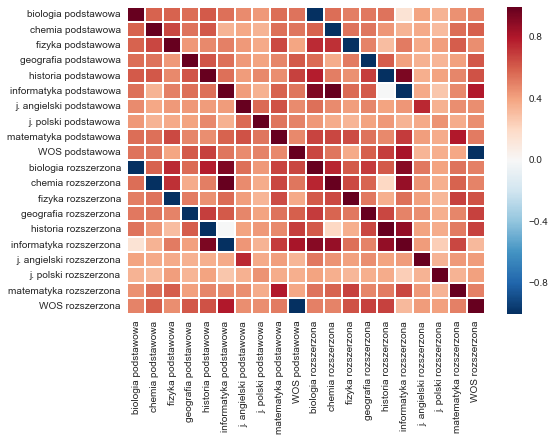

In [48]:
sns.heatmap(korelacje)

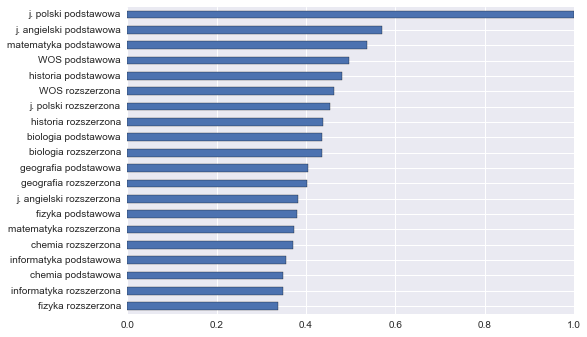

In [50]:
korelacje["j. polski podstawowa"].order().plot(kind='barh')

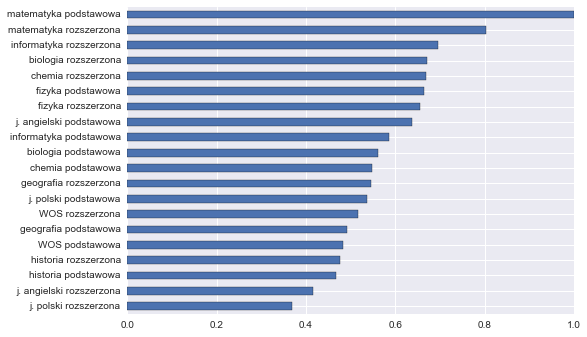

In [51]:
korelacje["matematyka podstawowa"].order().plot(kind='barh')

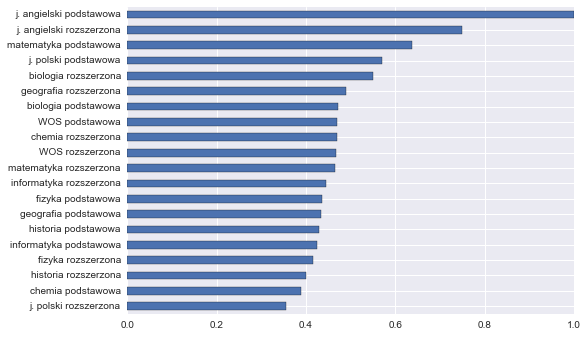

In [53]:
korelacje["j. angielski podstawowa"].order().plot(kind='barh')

In [54]:
korelacje_rok = {}
for rok in range(2010, 2015):
    df = pd.read_csv("../dane/przetworzone/sumy_laureaty_{}_znorm.csv".format(rok), low_memory=False)
    korelacje_rok[rok] = df.loc[:, przedmioty].rename(columns=przedmioty_dict).corr()

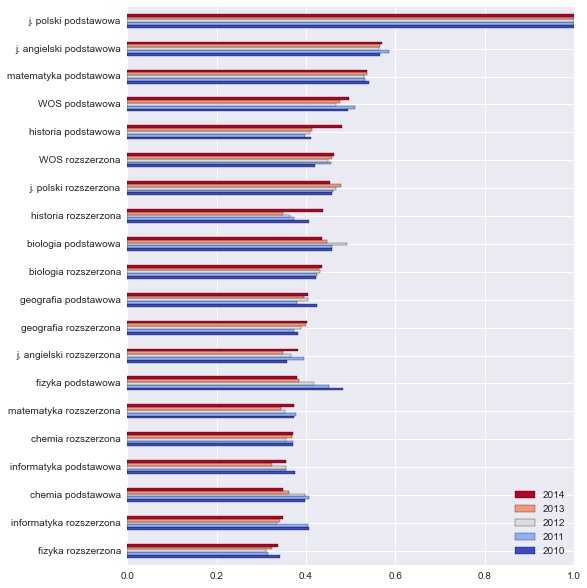

In [55]:
pd.DataFrame({k: v["j. polski podstawowa"] for k, v in korelacje_rok.items()}) \
  .sort(columns=2014) \
  .plot(kind="barh", figsize=(8,10), colormap="coolwarm", legend="reverse")

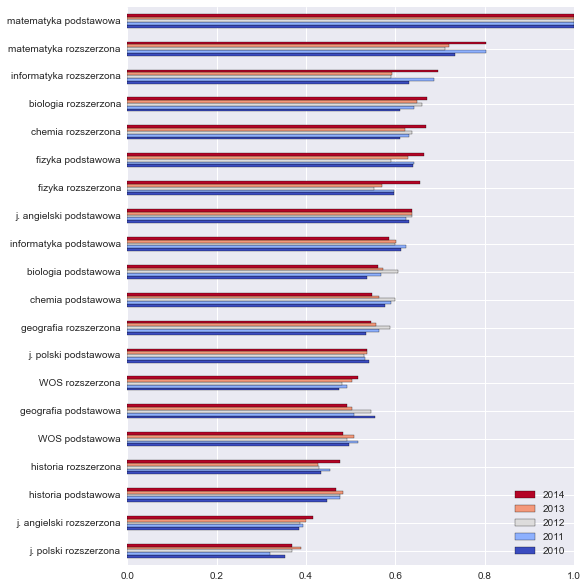

In [56]:
pd.DataFrame({k: v["matematyka podstawowa"] for k, v in korelacje_rok.items()}) \
  .sort(columns=2014) \
  .plot(kind="barh", figsize=(8,10), colormap="coolwarm", legend="reverse")

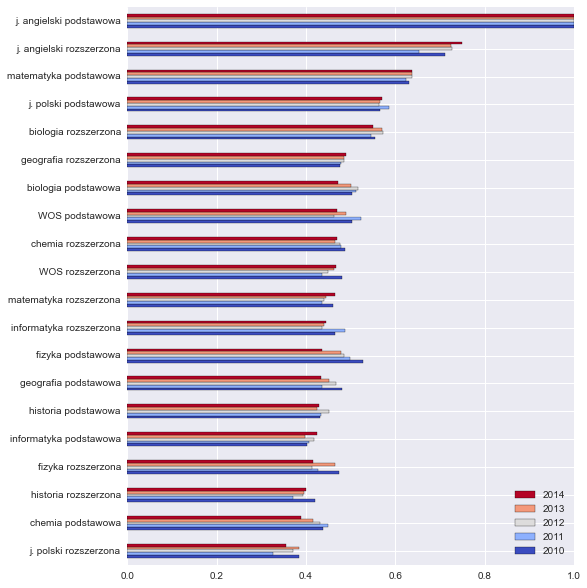

In [57]:
pd.DataFrame({k: v["j. angielski podstawowa"] for k, v in korelacje_rok.items()}) \
  .sort(columns=2014) \
  .plot(kind="barh", figsize=(8,10), colormap="coolwarm", legend="reverse")

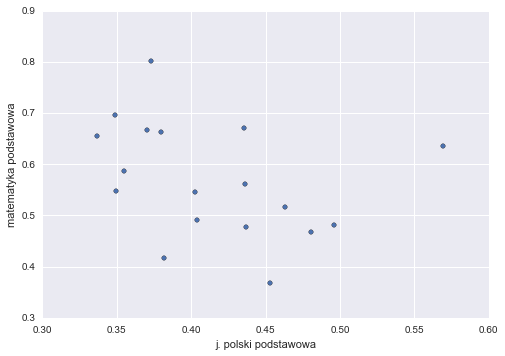

In [58]:
korelacje_rok[2014] \
  .drop("j. polski podstawowa") \
  .drop("matematyka podstawowa") \
  .plot(kind='scatter', x='j. polski podstawowa', y='matematyka podstawowa')

In [ ]:
# można w ggplot, coś jak laureatów, ale później, bo teraz mi się nie chce / nie mam czasu